In [ ]:
# pip install tensorflow==2.0.0a0

In [40]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
%matplotlib inline
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from shutil import copyfile
from os import getcwd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

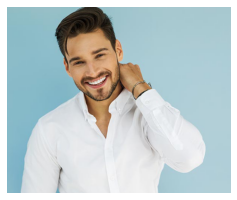

In [25]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
ncols, nrows = 1,1
fig.set_size_inches(ncols*4, nrows*4)

list_img = [os.path.join(f"{getcwd()}/aa/a", file) for file in os.listdir(f"{getcwd()}/aa/a")] 

for i, img in enumerate(list_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img)
  plt.imshow(img)

plt.show()

In [28]:
TRAINING_DIR = f"{getcwd()}/aa"  #YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale=1.0/255.)  #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 1 images belonging to 1 classes.


In [55]:
pwd

'/home/ish/environnements/ML_env/Coursera/CNN TF'

In [56]:
# To check what the generator is outputting is to get what it yields:
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    label = y[i]
    print(label)
    plt.imshow(image)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ish/environnements/ML_env/Coursera/CNN TF/aa/a/hom.jpg'

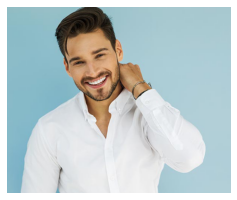

In [43]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
ncols, nrows = 1,1
fig.set_size_inches(ncols*4, nrows*4)

list_img = [os.path.join(f"{getcwd()}/aa/a", file) for file in os.listdir(f"{getcwd()}/aa/a")] 

for i, img in enumerate(list_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img)
  plt.imshow(img)

plt.show()

In [44]:
import glob

In [37]:
def data_augmentation(subdir):
    datagen = ImageDataGenerator(
       featurewise_center=False,
       samplewise_center=False,
       featurewise_std_normalization=False,
       samplewise_std_normalization=False,
       zca_whitening=False,
       rotation_range=30,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip=True,
       vertical_flip=False)

    print ("\nData augmentation...")
    print ("\nProcess...")

    for file in glob.glob(subdir+"*/*.jpg"):
        img = load_img(file)
        print ("\nProcessing..." + str(file))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='data_aug', save_prefix='Fig', save_format='jpg'):
            i += 1
            if i > 20:
                break

In [38]:
data_augmentation(f"{getcwd()}/aa/a")


Data augmentation...

Process...


NameError: name 'load_img' is not defined

In [29]:
TRAINING_DIR = f"{getcwd()}/aa"  #YOUR CODE HERE
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')  #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 1 images belonging to 1 classes.


ValueError: fname must be a PathLike or file handle

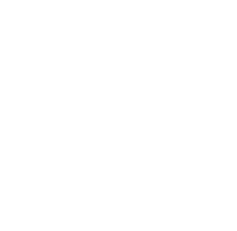

In [33]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
ncols, nrows = 1,1
fig.set_size_inches(ncols*4, nrows*4)

# list_img = [os.path.join(f"{getcwd()}/aa/a", file) for file in os.listdir(f"{getcwd()}/aa/a")] 
list_img = train_generator

for i, img in enumerate(list_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img)
  plt.imshow(img)

plt.show()

In [3]:
tf.__version__

'2.0.0-alpha0'

In [ ]:
# Download cats_and_dogs_filtered file
# !wget --no-check-certificate \https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
path = f"{getcwd()}/cats_and_dogs_filtered.zip"
# shutil.rmtree('/tmp')  This code Delete an entire directory tree which is '/tmp' here.

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
os.mkdir(f"{getcwd()}/PetImages")
os.mkdir(f"{getcwd()}/PetImages/Dog")
os.mkdir(f"{getcwd()}/PetImages/Cat")

In [5]:
list_cats1 = os.listdir(f"{getcwd()}/cats_and_dogs_filtered/train/cats") 
list_cats2 = os.listdir(f"{getcwd()}/cats_and_dogs_filtered/validation/cats")
list_dogs1 = os.listdir(f"{getcwd()}/cats_and_dogs_filtered/train/dogs") 
list_dogs2 = os.listdir(f"{getcwd()}/cats_and_dogs_filtered/validation/dogs")

i,j = 0, 0
for i, file1 in enumerate(list_cats1):
    copyfile(os.path.join(f"{getcwd()}/cats_and_dogs_filtered/train/cats", file1), os.path.join(f"{getcwd()}/PetImages/Cat", file1))
    i+=i
for j, file2 in enumerate(list_cats2):
    copyfile(os.path.join(f"{getcwd()}/cats_and_dogs_filtered/validation/cats", file2), os.path.join(f"{getcwd()}/PetImages/Cat", file2))
    j+=j
    
n, m = 0, 0
for n, file3 in enumerate(list_dogs1):
    copyfile(os.path.join(f"{getcwd()}/cats_and_dogs_filtered/train/dogs", file3), os.path.join(f"{getcwd()}/PetImages/Dog", file3))
    n+=n
for m, file4 in enumerate(list_dogs2):
    copyfile(os.path.join(f"{getcwd()}/cats_and_dogs_filtered/validation/dogs", file4), os.path.join(f"{getcwd()}/PetImages/Dog", file4))
    m+=m

In [6]:
print(len(os.listdir(f"{getcwd()}/PetImages/Cat")))
print(len(os.listdir(f"{getcwd()}/PetImages/Dog")))

# Expected Output:
# 1500
# 1500

1500
1500


In [7]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    os.mkdir(f"{getcwd()}/cats-v-dogs")
    os.mkdir(f"{getcwd()}/cats-v-dogs/training")
    os.mkdir(f"{getcwd()}/cats-v-dogs/testing")
    
    os.mkdir(f"{getcwd()}/cats-v-dogs/training/dogs")
    os.mkdir(f"{getcwd()}/cats-v-dogs/training/cats")
    os.mkdir(f"{getcwd()}/cats-v-dogs/testing/dogs")
    os.mkdir(f"{getcwd()}/cats-v-dogs/testing/cats")
except OSError:
    pass

In [8]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dataset = []
    
    for file in os.listdir(SOURCE):
        if (os.path.getsize(SOURCE + file))>0:
            dataset.append(file)
        else:
            print(file + ' Skipped')
            print('Invalid file i.e zero size')
        
    list_source = random.sample(dataset, len(dataset))
    list_train = list_source[:int(len(dataset)*SPLIT_SIZE)]                       
    list_test = list_source[-int(len(dataset) - int(len(dataset)*SPLIT_SIZE)):]               

    for file1 in list_train:
        copyfile(os.path.join(SOURCE, file1), os.path.join(TRAINING, file1))
    for file2 in list_test:
        copyfile(os.path.join(SOURCE, file2), os.path.join(TESTING, file2)) 
        
CAT_SOURCE_DIR = f"{getcwd()}/PetImages/Cat/"
TRAINING_CATS_DIR = f"{getcwd()}/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = f"{getcwd()}/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = f"{getcwd()}/PetImages/Dog/"
TRAINING_DOGS_DIR = f"{getcwd()}/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = f"{getcwd()}/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [9]:
print(len(os.listdir(f"{getcwd()}/cats-v-dogs/training/dogs")))
print(len(os.listdir(f"{getcwd()}/cats-v-dogs/training/cats")))
print(len(os.listdir(f"{getcwd()}/cats-v-dogs/testing/dogs")))
print(len(os.listdir(f"{getcwd()}/cats-v-dogs/testing/cats")))
# Expected output:
# 1350
# 1350
# 150
# 150

1350
1350
150
150


In [10]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

# NOTE:

In the cell below you **MUST** use a batch size of 10 (`batch_size=10`) for the `train_generator` and the `validation_generator`. Using a batch size greater than 10 will exceed memory limits on the Coursera platform.

In [11]:
TRAINING_DIR = f"{getcwd()}/cats-v-dogs/training"  #YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale=1.0/255.)  #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))  #YOUR CODE HERE

VALIDATION_DIR = f"{getcwd()}/cats-v-dogs/testing" #YOUR CODE HERE
validation_datagen = ImageDataGenerator(1.0/255.)  #YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size=10,
                                                             class_mode='binary',
                                                             target_size=(150, 150))  #YOUR CODE HERE



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [12]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [13]:
history = model.fit_generator(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/2
269/270 [============================>.] - ETA: 0s - loss: 0.7412 - acc: 0.5725

/home/ish/environnements/ML_env/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


270/270 [==============================] - 88s 327ms/step - loss: 0.7408 - acc: 0.5730 - val_loss: 28.1384 - val_acc: 0.6367
Epoch 2/2
270/270 [==============================] - 93s 343ms/step - loss: 0.6192 - acc: 0.6700 - val_loss: 64.3780 - val_acc: 0.6733


Text(0.5, 1.0, 'Training and validation loss')

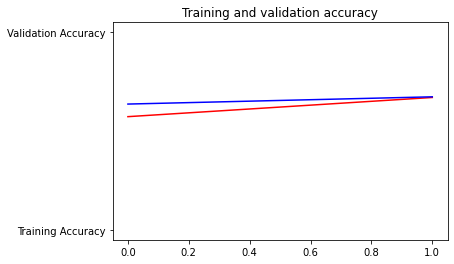

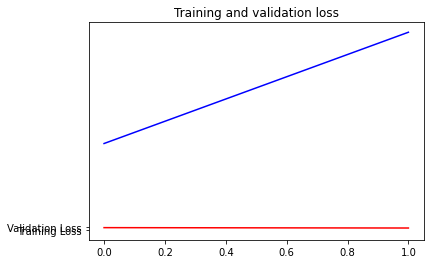

In [14]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

# Submission Instructions

In [15]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);